## GSW Game Logs

Author: 
    Sahil D. Shah (sahil.shah@u.northwestern.edu)
    
Last updated: 
    04/08/19
    
Description: 
    Code used for my GSW Game Log analysis: What are the most important variables?
    
   https://www.reddit.com/r/nba/comments/8hh0kt/ocsteve_kerr_said_the_most_important_boxscore/
   
   "I look at the opponent's field goal percentage, our assists, and our turnovers. Those are
   the three numbers... If we defend and take care of the ball we win. And it's generally the
   case, and those three numbers usually tell the story."
   
   What variables are most importnt for predicting GSW win? Are they the three Steve Kerr
   said?
    
Dataset: 
   
   GSW Game Logs from the 
   2015-2016, 
   2016-2017, 
   2017-2018 
   
   seasons from Basketball Reference:
   
   https://www.basketball-reference.com/teams/GSW/2016/gamelog/
   
   Saved each of the three season's game logs as CSV files, dropped extra columns 
   and copied into CSV file: GSW-GameLogs.csv 82*3 games by 17 stats (16 team/opp stats + W/L)
   

### Import modules and check versions of packages


In [36]:

import pandas as pd

import sklearn

import numpy as np

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

import matplotlib

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]

What version of Python am I running?

https://stackoverflow.com/questions/40694528/how-to-know-which-is-running-in-jupyter-notebook

In [37]:
from platform import python_version

print(python_version())

3.6.1


What version of pandas, matplotlib, and seaborn did I perform this analysis with ?

In [38]:
pd.__version__

'0.23.4'

In [39]:
sklearn.__version__

'0.18.1'

In [40]:
np.__version__

'1.15.0'

In [41]:
matplotlib.__version__

'2.2.2'

### Obtain the data

Save table from Basketball Reference as a csv and read in as a Pandas dataframe

In [42]:
df_raw = pd.read_csv("../data/GSW-GameLog.csv")

In [43]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 17 columns):
W/L             246 non-null object
Team FG%        246 non-null float64
Team 3P%        246 non-null float64
Team FT%        246 non-null float64
Team TRB        246 non-null int64
Team AST        246 non-null int64
Team STL        246 non-null int64
Team BLK        246 non-null int64
Team TOV        246 non-null int64
Opponent FG%    246 non-null float64
Opponent 3P%    246 non-null float64
Opponent FT%    246 non-null float64
Opponent TRB    246 non-null int64
Opponent AST    246 non-null int64
Opponent STL    246 non-null int64
Opponent BLK    246 non-null int64
Opponent TOV    246 non-null int64
dtypes: float64(6), int64(10), object(1)
memory usage: 32.8+ KB


In [44]:
#df_raw.head()

### Model the data 

For info on parameters and RandomForestClassifier function see:

- https://scikit-learn.org/stable/modules/ensemble.html#parameters

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

In [51]:
    
RFC = RandomForestClassifier(n_estimators = 100,
                             max_features = "auto") # If “auto”, then max_features=sqrt(n_features).

Info on forest classifiers: 

"forest classifiers have to be fitted with two arrays: a sparse or dense array X of size [n_samples, n_features] holding the training samples, and an array Y of size [n_samples] holding the target values (class labels) for the training samples:"

For more info see: https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees : 

In [52]:
X = df_raw.iloc[:,1:]
y = df_raw.iloc[:,0].values

#### Evaluate performance of classifier with cross-validation 

For info on evaluating performance with cross validation see:

- https://scikit-learn.org/stable/modules/cross_validation.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

In [88]:
scores = cross_val_score(RFC, X, y, scoring = 'accuracy', cv=3)

In [89]:
scores

array([0.85365854, 0.90243902, 0.91463415])

In [91]:
np.mean(scores)

0.8902439024390244

#### Fit the classifier to all the training data to compute feature importance 

In [81]:
clf = RFC.fit(X, y)

### Visualize feature importance

In [82]:
df_vp = pd.DataFrame(data = clf.feature_importances_,
                     index = list(X), #list(data frame) colnames
                     columns = ['feature_importance'])

In [83]:
df_sorted = df_vp.sort_values(by=['feature_importance'])

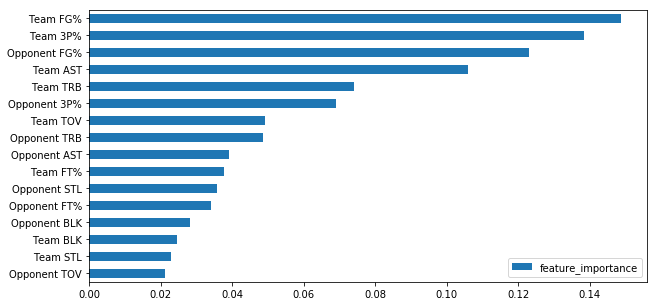

In [84]:
df_sorted.plot.barh()
plt.show()